# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [4]:
import numpy as np
D = np.loadtxt('lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [5]:
import torch
import matplotlib.pyplot as plt

1.

In [11]:
#1
class lin_regr(torch.nn.Module):
        def __init__(self, inputSize, outputSize):
            super(lin_regr, self).__init__()
            self.linear = torch.nn.Linear(inputSize, outputSize)

        def forward(self, x):
            return self.linear(x)

In [12]:
def learn(decay, XX, YY, testXX, testYY, model = None):

    X_train = XX.reshape(-1, 4)
    Y_train = YY.reshape(-1, 1)
    X_train = torch.tensor(X_train).float()
    Y_train = torch.tensor(Y_train).float()
    X_test = testXX.reshape(-1, 4)
    Y_test = testYY.reshape(-1, 1)
    X_test = torch.tensor(X_test).float()
    Y_test = torch.tensor(Y_test).float()

    inputDim = 4
    outputDim = 1
    learningRate = 0.01
    epochs = 1000
    
    if (model == None):
        model = lin_regr(inputDim, outputDim)

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learningRate, weight_decay=decay)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        loss = criterion(model(X_train), Y_train)
        val_loss = -1
        if testXX != []:
            val_loss = criterion(model(X_test), Y_test)
    return [float(loss.item()), float(val_loss.item())]



c:\Users\Elizaveta\text_2\venv\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


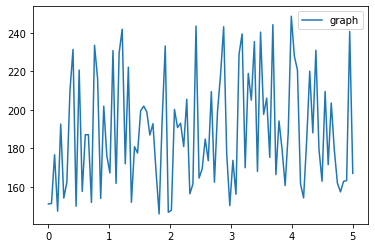

In [13]:
model = lin_regr(4, 1)

vallosses = []
steps = np.linspace(0, 5, 100)
for i in steps:
    have_loss = learn(i, X.copy(), Y.copy(), X.copy(), Y.copy())
    vallosses.append(have_loss[1])

plt.plot(steps, vallosses, label = 'graph')
plt.legend()

In [18]:
#2
k = 5
size_f = 200

In [19]:
def folding(folds):
    manyfolds = []
    iterator = 0
    for j in range(len(folds)):
        iterator += 1
        if (iterator == k):
            break
        if (j + 5) > len(folds) - 1:
            diff = j + 5 - len(folds)
            buf = []
            for iter1 in range(j, len(folds)):
                buf.append(folds[iter1])
            for iter2 in range(diff):
                buf.append(folds[iter2])
            manyfolds.append((buf[:4], buf[-1]))
        else:
            buf = []
            for iter3 in range(j, j + 4):
                buf.append(folds[iter3])
            manyfolds.append((buf[:4], buf[-1]))
    return manyfolds
        

In [20]:
list_X = []
for i in range(0, len(X), size_f):
    list_X.append(X[i : i + size_f])
Xfolds = folding(list_X)

list_Y = []
for i in range(0, len(Y), size_f):
    list_Y.append(Y[i : i + size_f])
Yfolds = folding(list_Y)

In [21]:
losses = []
steps2 = np.linspace(0, 2, 100)
for l in steps2:
    model = lin_regr(4, 1)
    ler = None
    for i in range(len(Xfolds)):
        ler = learn(l, np.array(Xfolds[i][0]), np.array(Yfolds[i][0]), np.array(Xfolds[i][1]), np.array(Yfolds[i][1]), model)
    losses.append(ler)
trainl = []
testl = []
for loss in losses:
    trainl.append(loss[0])
    testl.append(loss[1])

c:\Users\Elizaveta\text_2\venv\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


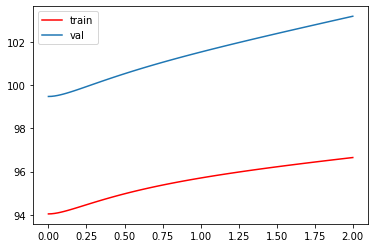

In [22]:
# 4-5
plt.plot(steps2, trainl, label = 'train', color = 'r')
plt.plot(steps2, testl, label = 'val')
plt.legend()
# нет зависимости